<a href="https://colab.research.google.com/github/Yashwant-Code98/Covid-EDA/blob/master/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
heart = pd.read_csv("heart.csv")

In [6]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


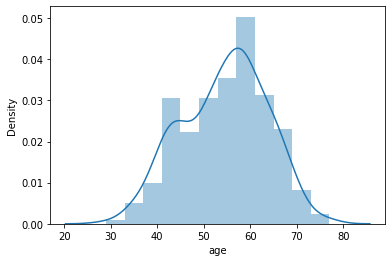

In [10]:
sns.distplot(heart["age"])
plt.show()

In [11]:
heart.shape

(303, 14)

In [13]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
heart["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [15]:
heart["sex"].value_counts().keys()

Int64Index([1, 0], dtype='int64')

In [16]:
heart["sex"].value_counts().values

array([207,  96])

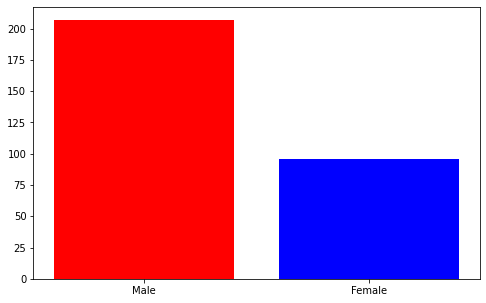

In [17]:
plt.figure(figsize=(8,5))
plt.bar(list(("Male","Female")),list(heart["sex"].value_counts()),color=["red","blue"])
plt.show()

In [18]:
heart["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

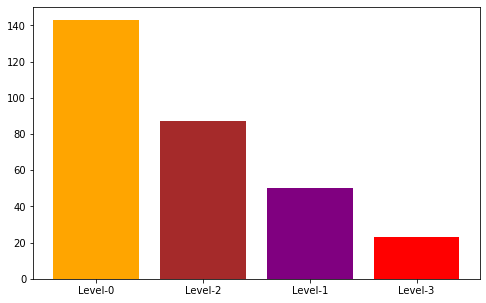

In [19]:
plt.figure(figsize=(8,5))
plt.bar(list(("Level-0","Level-2","Level-1","Level-3")),list(heart["cp"].value_counts()),color=["orange","brown","purple","red"])
plt.show()

In [20]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
heart["chol"].value_counts()

234    6
204    6
197    6
269    5
212    5
      ..
278    1
281    1
284    1
290    1
564    1
Name: chol, Length: 152, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


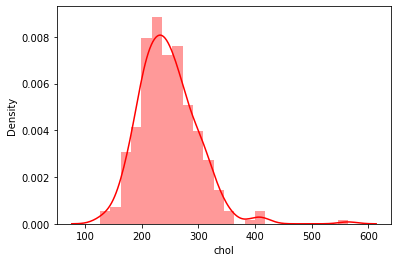

In [23]:
sns.distplot(heart["chol"],color="red")
plt.show()

In [24]:
heart["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

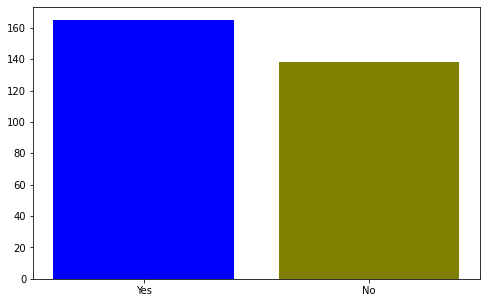

In [25]:
plt.figure(figsize=(8,5))
plt.bar(list(("Yes","No")),list(heart["target"].value_counts()),color=["blue","olive"])
plt.show()

In [26]:
# Split the model into train & testing

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
x = heart[["age"]]
y = heart[["target"]]

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.65)

In [31]:
x_train.head()

,age
36,54
29,53
83,52
255,45
291,58


In [32]:
x_test.head()

,age
94,45
281,52
302,57
52,62
283,40


In [33]:
y_train.head()

,target
36,1
29,1
83,1
255,0
291,0


In [34]:
y_test.head()

,target
94,1
281,0
302,0
52,1
283,0


In [36]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
mnb = MultinomialNB()

In [38]:
mnb.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [40]:
y_pred = mnb.predict(x_test)

In [41]:
y_test.head(),y_pred[0:5]

(     target
 94        1
 281       0
 302       0
 52        1
 283       0, array([1, 1, 1, 1, 1]))

In [44]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_test,y_pred)

array([[  0,  94],
       [  0, 103]])

In [47]:
(103)/(94+103)

0.5228426395939086

In [48]:
# Model 2

In [49]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [50]:
x = heart[["age","trestbps","chol"]]
y = heart[["target"]]

In [51]:
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [75]:
x_train.head()

,age,trestbps,chol
247,66,160,246
227,35,120,198
35,46,142,177
92,52,138,223
106,69,160,234


In [76]:
x_test.head()

,age,trestbps,chol
200,44,110,197
252,62,138,294
53,44,108,141
90,48,124,255
16,58,120,340


In [77]:
y_train.head()

,target
247,0
227,0
35,1
92,1
106,1


In [78]:
y_test.head()

,target
200,0
252,0
53,1
90,1
16,1


In [79]:
# Naive Bayes

In [91]:
from sklearn.naive_bayes import GaussianNB

In [94]:
mnb = GaussianNB()

In [95]:
mnb.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [96]:
y_pred = mnb.predict(x_test)

In [97]:
#Actual Values
y_test.head()

,target
200,0
252,0
53,1
90,1
16,1


In [98]:
#Predicted Values
y_pred[0:5]

array([1, 0, 1, 1, 1])

In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
confusion_matrix(y_test,y_pred)

array([[28, 29],
       [17, 48]])

In [102]:
(28+48)/(29+17+28+48)

0.6229508196721312